<a href="https://colab.research.google.com/github/HariSkr11/indian-sign-language-detection/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# IMPORTING NECESSARY FUNCTIONS AND MODULES

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from pickle import load,dump
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import sklearn

# IMPORTING DATA

## IMPORTING TRAIN DATA

In [ ]:
with open("/content/drive/MyDrive/resources_sign/X_train.pkl","rb") as file_object:
  X_train = load(file_object)

## IMPORTING TRAINING LABELS

In [ ]:
with open("/content/drive/MyDrive/resources_sign/y_train.pkl","rb") as file_object:
  y_train = load(file_object)

## IMPORTING TESTING DATA

In [ ]:
with open("/content/drive/MyDrive/resources_sign/X_test.pkl","rb") as file_object:
  X_test = load(file_object)

## IMPORTING TESTING LABELS

In [ ]:
with open("/content/drive/MyDrive/resources_sign/y_test.pkl","rb") as file_object:
  y_test = load(file_object)

## IMPORTING THE LABEL ENCODER

In [ ]:
with open("/content/drive/MyDrive/resources_sign/Label_encoder.pkl","rb") as file_object:
  label_encoder = load(file_object)

# VISUALIZING AND PREPROCESSING THE DATA

In [ ]:
cv2_imshow(X_train[68]*255)

In [ ]:
cv2_imshow(X_test[68]*255)

## ANALYZING ALL THE LABELS AND THE IMAGES

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(9,7))
row = 0
col = 0
for i in range(9):
  if col == 4:
    col=0
    row+=1
    axes[row][col].imshow(X_train[i])
    axes[row][col].set_title(label_encoder.inverse_transform([y_train[i]])[0])
  else:
    axes[row][col].imshow(X_train[i])
    axes[row][col].set_title(label_encoder.inverse_transform([y_train[i]])[0])
    col+=1

# APPLYING CANNY EDGE DETECTOR

## CHECKING OUT CANNY FILTER

In [ ]:
img = X_train[56]*255
grey = cv.cvtColor(img.astype(np.uint8),cv.COLOR_BGR2GRAY)
blur = cv.blur(grey,ksize=(5,5))
med_val = np.median(blur)
lower = int(max(0 ,0.7*med_val))
upper = int(min(255,1.3*med_val))
cv2_imshow(blur)
edges = cv.Canny(image=blur, threshold1=lower,threshold2=upper)
cv2_imshow(edges)

## MAKING CANNY FUNCTION FOR EVERY IMAGES

In [ ]:
def apply_canny_filter(img):
  img = img*255
  img = cv.cvtColor(img.astype(np.uint8),cv.COLOR_BGR2GRAY)
  blur = cv.blur(img,ksize=(5,5))
  med_val = np.median(blur)
  lower = int(max(0 ,0.7*med_val))
  upper = int(min(255,1.3*med_val))
  return cv.Canny(image=blur, threshold1=lower,threshold2=upper)

## APPLYING THE FILTER TO EVERY IMAGES

In [ ]:
X_train_filtered = []
for image in X_train:
  X_train_filtered.append(apply_canny_filter(image))

In [ ]:
cv2_imshow(X_train_filtered[1980])

## PREPROCESSING TEST SET

In [ ]:
X_test_filtered = []
for image in X_test:
  X_test_filtered.append(apply_canny_filter(image))

In [ ]:
cv2_imshow(X_test_filtered[250])

## STORING THE FILTERED DATA BACK AS PKL FILES

In [ ]:
with open("/content/drive/MyDrive/resources_sign/X_train_filtered.pkl","wb") as file_object:
  dump(X_train_filtered,file_object)

In [ ]:
with open("/content/drive/MyDrive/resources_sign/X_test_filtered.pkl","wb") as file_object:
  dump(X_test_filtered,file_object)

# OPENING THE FILTERED DATA FOR TRAINING

In [ ]:
from pickle import load,dump
with open("/content/drive/MyDrive/resources_sign/X_train_filtered.pkl","rb") as file_object:
  X_train_filtered=load(file_object)
with open("/content/drive/MyDrive/resources_sign/X_test_filtered.pkl","rb") as file_object:
  X_test_filtered=load(file_object)
with open("/content/drive/MyDrive/resources_sign/y_train.pkl","rb") as file_object:
  y_train=load(file_object)
with open("/content/drive/MyDrive/resources_sign/y_test.pkl","rb") as file_object:
  y_test=load(file_object)

# MAKING THE MODEL

## MODELS

## MODEL 1

In [2]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.models import Sequential
class Sign_model:
  def __init__(self,input_shape,classes = 32):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), input_shape=(220, 220,1),strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(64, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(32, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 1000 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 32 , activation = 'softmax'))
    model.compile(optimizer="adam",metrics = ['accuracy'],loss = "sparse_categorical_crossentropy")
    self.model = model

In [3]:
model_object = Sign_model((220,220))
model = model_object.model

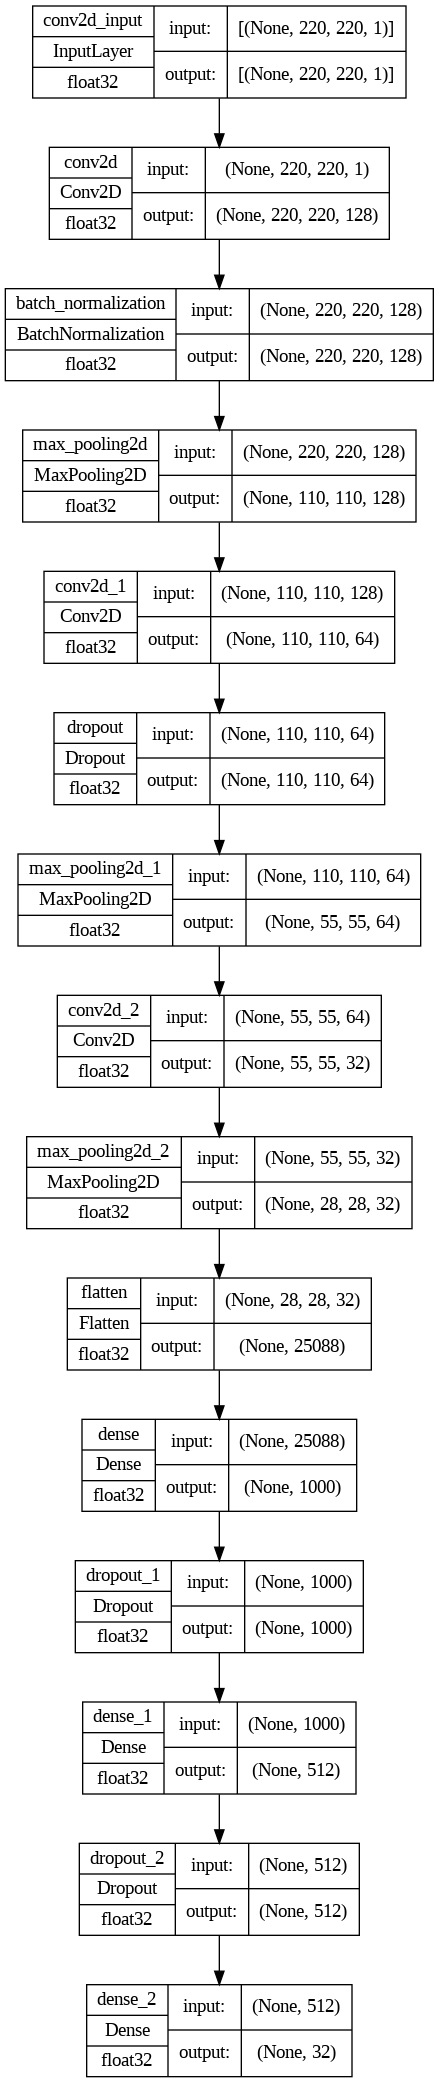

In [5]:
tf.keras.utils.plot_model(
    model,
    "model architecture.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 128)     1280      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      73792     
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)      

In [ ]:
len(label_encoder.classes_)

32

In [ ]:
model.fit(np.array(X_train_filtered),y_train,epochs = 3)

Epoch 1/3
88/88 [==============================] - 25s 285ms/step - loss: 1.2410 - accuracy: 0.6806
Epoch 2/3
88/88 [==============================] - 25s 284ms/step - loss: 0.4242 - accuracy: 0.8785
Epoch 3/3
88/88 [==============================] - 25s 284ms/step - loss: 0.1855 - accuracy: 0.9491


In [ ]:
model.evaluate(np.array(X_test_filtered),y_test)

22/22 [==============================] - 2s 67ms/step - loss: 0.9896 - accuracy: 0.7507


[0.9896190166473389, 0.7507163286209106]

## APPLYING TRANSFER LEARNING ARCHITECTURE TO IMPROVE THE MODEL

### LOADING THE MODEL

In [6]:
transfer = tf.keras.applications.vgg16.VGG16(weights = "imagenet",input_shape=(220,220,3),include_top=False)
transfer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


### TRANSFORMING THE INPUTS ACCORDING TO THE MODEL

In [ ]:
X_train_filtered = np.array([cv.cvtColor(i,cv.COLOR_GRAY2RGB) for i in X_train_filtered])
X_test_filtered = np.array([cv.cvtColor(i,cv.COLOR_GRAY2RGB) for i in X_test_filtered])

In [ ]:
X_train_filtered.shape

(2790, 220, 220, 3)

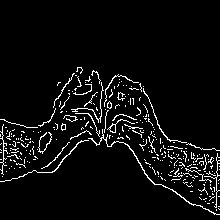

In [ ]:
cv2_imshow(X_train_filtered[5])

### GOING THROUGH THE MODEL

In [ ]:
transfer.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 220, 220, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 220, 220, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 220, 220, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 110, 110, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 110, 110, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 110, 110, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 55, 55, 128)       0     

### BUILDING THE MODEL

In [7]:
class transfer_model:
  def __init__(self,transfer_model,number_dense=3,dense=[256,128,64],dropout=0.1,output_dim=32):
    self.model = tf.keras.Sequential(transfer_model)
    self.model.add(tf.keras.layers.Flatten())
    for i in range(number_dense):
      self.model.add(tf.keras.layers.Dense(dense[i],activation="relu"))
      self.model.add(tf.keras.layers.Dropout(dropout))
    self.model.add(tf.keras.layers.Dense(output_dim,activation="softmax"))

In [8]:
t_model = transfer_model(transfer,number_dense=4,dense=[512,256,128,64]).model

### COMPILING THE MODEL

In [9]:
t_model.compile(optimizer = "adam",metrics=['accuracy'],loss = "sparse_categorical_crossentropy")

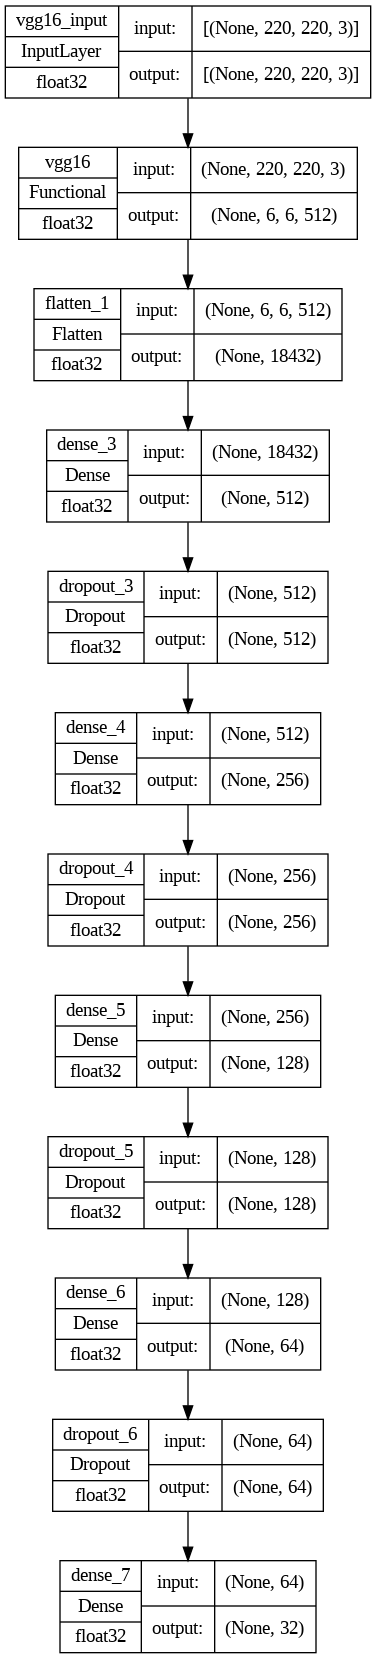

In [15]:
tf.keras.utils.plot_model(
    t_model,
    "transfer model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
)

In [ ]:
t_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 18432)             0         
                                                                 
 dense_28 (Dense)            (None, 512)               9437696   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)              

### HISTORY CREATION

In [ ]:
loss_list = []
accuracy_list = []
val_loss = []
val_accuracy = []

### FITTING THE MODEL

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
history = t_model.fit(X_train_filtered,y_train,epochs=15,validation_split=0.2,callbacks=[es])

Epoch 1/15
70/70 [==============================] - 14s 171ms/step - loss: 4.0995 - accuracy: 0.2339 - val_loss: 1.8647 - val_accuracy: 0.5251
Epoch 2/15
70/70 [==============================] - 11s 153ms/step - loss: 1.8030 - accuracy: 0.5157 - val_loss: 1.2129 - val_accuracy: 0.6667
Epoch 3/15
70/70 [==============================] - 11s 161ms/step - loss: 1.2233 - accuracy: 0.6662 - val_loss: 0.9288 - val_accuracy: 0.7545
Epoch 4/15
70/70 [==============================] - 11s 160ms/step - loss: 0.8158 - accuracy: 0.7818 - val_loss: 0.8063 - val_accuracy: 0.7867
Epoch 5/15
70/70 [==============================] - 11s 160ms/step - loss: 0.5890 - accuracy: 0.8311 - val_loss: 0.5986 - val_accuracy: 0.8387
Epoch 6/15
70/70 [==============================] - 11s 159ms/step - loss: 0.5337 - accuracy: 0.8495 - val_loss: 0.6828 - val_accuracy: 0.8297
Epoch 7/15
70/70 [==============================] - 11s 161ms/step - loss: 0.4048 - accuracy: 0.8858 - val_loss: 0.7548 - val_accuracy: 0.8351

### ADDING HISTORY DATA

In [ ]:
loss_list+=history.history['loss']
accuracy_list = history.history['accuracy']
val_loss+=history.history['val_loss']
val_accuracy += history.history['val_accuracy']

### VISUALIZING THE MODEL PERFOMANCE

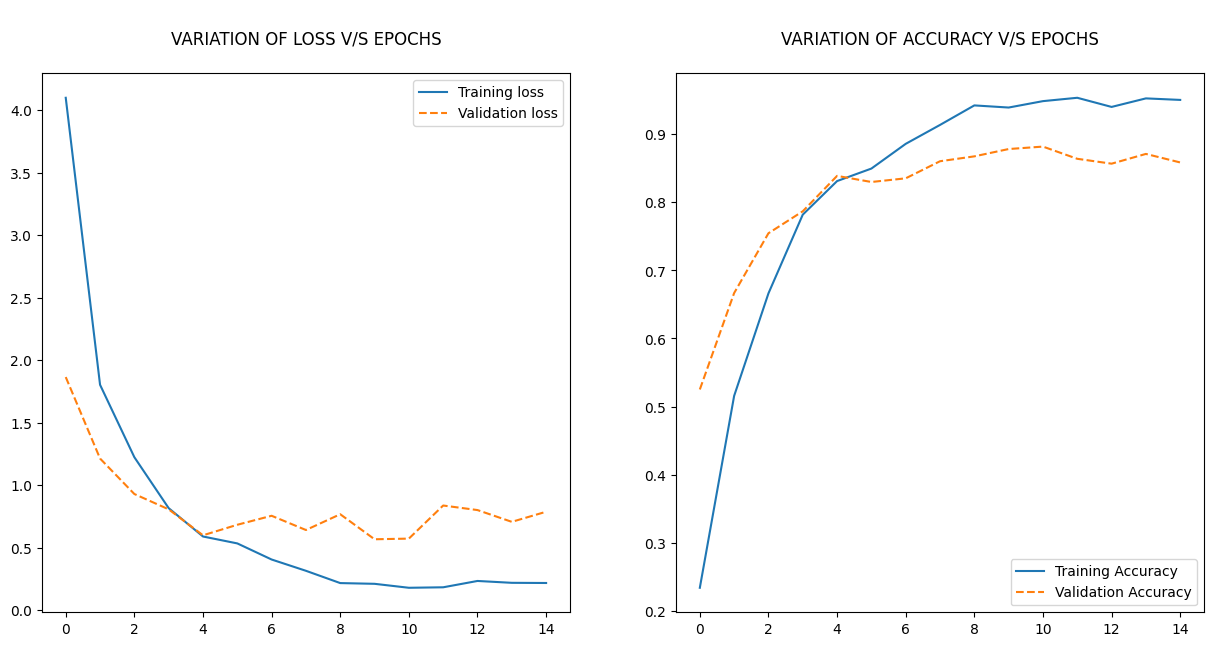

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
axes[0].set_title("\nVARIATION OF LOSS V/S EPOCHS\n")
axes[0].plot(loss_list,label="Training loss")
axes[0].plot(val_loss,label = "Validation loss",linestyle = "dashed")
axes[0].legend(loc="upper right")

axes[1].set_title("\nVARIATION OF ACCURACY V/S EPOCHS\n")
axes[1].plot(accuracy_list,label = "Training Accuracy")
axes[1].plot(val_accuracy,label = "Validation Accuracy",linestyle = "dashed")
axes[1].legend(loc="lower right")
fig.show()

### EVALUATING THE MODEL

In [ ]:
t_model.evaluate(X_test_filtered,y_test)

22/22 [==============================] - 3s 119ms/step - loss: 0.8128 - accuracy: 0.8553


[0.81284499168396, 0.8553008437156677]